Plotly, also known by its URL, Plot.ly, is a technical computing company headquartered in Montreal, Quebec, that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

Plotly was founded by Alex Johnson, Jack Parmer, Chris Parmer, and Matthew Sundquist. The founders' backgrounds are in science, energy, and data analysis and visualization. Early employees include Christophe Viau, a Canadian software engineer and Ben Postlethwaite, a Canadian geophysicist. Plotly was named one of the Top 20 Hottest Innovative Companies in Canada by the Canadian Innovation Exchange. Plotly was featured in "startup row" at PyCon 2013, and sponsored the SciPy 2018 conference.

Plotly raised $5.5 million during its Series A funding, led by MHS Capital, Siemens Venture Capital, Rho Ventures, Real Ventures, and Silicon Valley Bank.

Google and NASA have used Plotly for data analytics, and The Boston Globe and Washington Post newsrooms have produced data journalism using Plotly.

In [8]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

import os
print(os.listdir())


['.ipynb_checkpoints', 'Data visualization using plotly.ipynb', 'graph.png', 'Iris Species Classification.ipynb', 'KNN.ipynb', 'labsheet Q1.ipynb', 'Labsheet Q2.ipynb', 'labsheet Q3.ipynb', 'othertools.pptx', 'SVM with different kernels.ipynb', 'SVM.ipynb', 'timesData.csv']


In [3]:
!pip install wordcloud


In [9]:
# Load data that we will use.
timesData = pd.read_csv("timesData.csv")
timesData.info()
timesData.head(20)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [10]:
#...........................................LINE CHART................................................................

# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [11]:
#.............................................SCATTER CHART.......................................................


# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [12]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [13]:

#.............................................PIE CHART....................................................................
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [14]:
#................................................HISTOGRAM......................................................


# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

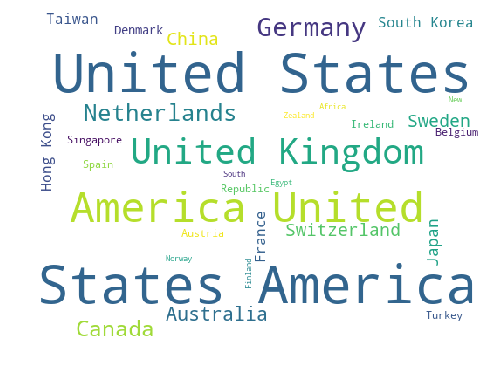

In [16]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [17]:
# create trace 1 that is 3d scatter
import pandas as pd
datax=pd.read_csv("timesData.csv")
trace1 = go.Scatter3d(
    x=datax.world_rank,
    y=datax.research,
    z=datax.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

THE END